In [16]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import func
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [17]:
# Replace 'hawaii.sqlite' with the actual path to the SQLite database file
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

# Reflect the database tables
Base = automap_base()
Base.prepare(autoload_with=engine)

inspector = inspect(engine)
table_names = inspector.get_table_names()
print(table_names)

# Save references to the tables
Station = Base.classes.station
Measurement = Base.classes.measurement

session = Session(engine)

['measurement', 'station']


/var/folders/vh/dvt1pytj3nb7y8t2gfyrn07r0000gn/T/ipykernel_37304/1245661613.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


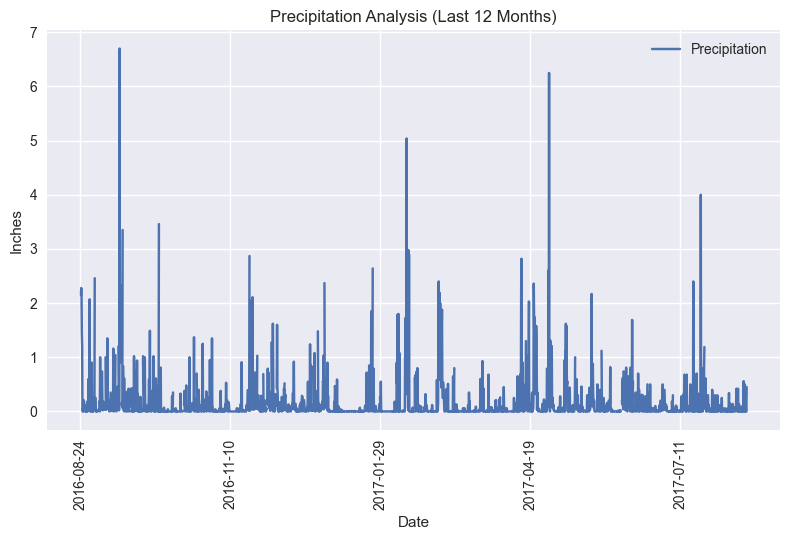

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


In [18]:
# Precipitation Analysis
# Get the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Calculate the date one year ago from the most recent date
one_year_ago = datetime.strptime(most_recent_date, '%Y-%m-%d') - timedelta(days=365)

# Query the precipitation data for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Create a DataFrame from the query results
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame by date
precipitation_df = precipitation_df.sort_values(by='Date')

# Set the plot style
plt.style.use('seaborn')

# Plot the precipitation data
precipitation_df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Analysis (Last 12 Months)')
plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics for precipitation
print(precipitation_df.describe())

Total number of stations: 9
The most active station is USC00519281 with 2772 observations.
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66°F


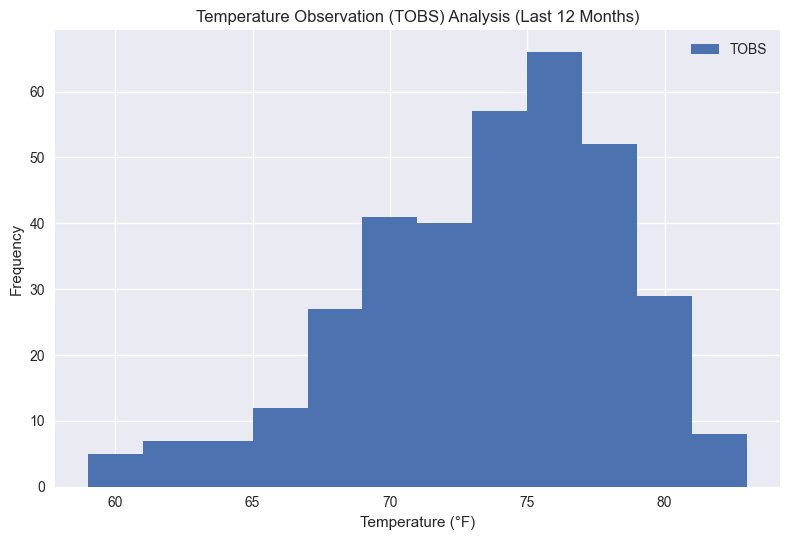

In [19]:
# Station Analysis
# Count the total number of stations
total_stations = session.query(Station.station).count()
print(f"Total number of stations: {total_stations}")

# Query to list stations and their observation counts in descending order
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Get the station with the most observations
most_active_station = station_counts[0]
print(f"The most active station is {most_active_station[0]} with {most_active_station[1]} observations.")

# Query to calculate the lowest, highest, and average temperatures for the most-active station
temperature_stats = session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station[0]).all()

print(f"Lowest Temperature: {temperature_stats[0][0]}°F")
print(f"Highest Temperature: {temperature_stats[0][1]}°F")
print(f"Average Temperature: {temperature_stats[0][2]:.2f}°F")

# Query TOBS data for the most-active station for the last 12 months
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station[0]).\
    filter(Measurement.date >= one_year_ago).all()

# Create a DataFrame for TOBS data
tobs_df = pd.DataFrame(tobs_data, columns=['TOBS'])

# Plot TOBS data as a histogram
tobs_df.plot.hist(bins = 12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation (TOBS) Analysis (Last 12 Months)')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# Close the session
session.close()